# **BUSINESS UNDERSTANDING**

**Background**

Breast cancer is one of the most common types of cancer affecting women worldwide. Early detection plays a crucial role in improving survival rates. Machine learning can assist healthcare professionals in diagnosing breast cancer more accurately by distinguishing between benign (non-cancerous) and malignant (cancerous) tumors

**Problem Statement**

Despite advancements in technology, misdiagnosis of breast cancer remains a significant challenge. The goal is to develop a predictive model that can classify tumors as benign or malignant based on specific features derived from a breast cancer dataset.

# Main Obective: #

To develop a machine learning model that accurately predicts whether a breast tumor is benign or malignant, thereby aiding in early cancer diagnosis and improving patient outcomes.

# Specific Objectives:

* To explore and analyze the breast cancer dataset to understand the key features affecting tumor classification.

* To preprocess the data, including handling missing values, normalizing the features, and performing feature selection.

* To build, train, and evaluate machine learning models (e.g., logistic regression, random forest, K-Nearest Neighbors) to classify breast cancer tumors.

# **1.IMPORTING LIBRARIES AND WARNINGS**




In [4]:
import os
import joblib
import pickle
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Data Understanding

**2.1 Loading Data**

We'll load our data and analyse it

In [5]:
df = pd.read_csv("data/Wisconsin Breast Cancer Data Set.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [6]:
df[["diagnosis", "radius_mean", "concavity_mean", "smoothness_mean", "texture_mean"]].head(30)

,diagnosis,radius_mean,concavity_mean,smoothness_mean,texture_mean
0,M,17.990,0.30010,0.11840,10.38
1,M,20.570,0.08690,0.08474,17.77
2,M,19.690,0.19740,0.10960,21.25
3,M,11.420,0.24140,0.14250,20.38
4,M,20.290,0.19800,0.10030,14.34
5,M,12.450,0.15780,0.12780,15.70
6,M,18.250,0.11270,0.09463,19.98
7,M,13.710,0.09366,0.11890,20.83
8,M,13.000,0.18590,0.12730,21.82
9,M,12.460,0.22730,0.11860,24.04


In [7]:
#Looking at each columns data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
#Summary statistics
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [9]:
# Checking the number of rows and columns
df.shape

(569, 33)

In [10]:
#checking the columns in the dataset
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [11]:
# Checking the unique diagnosis types,
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

# **3. DATA PREPARATION**

3.1 Check if there are any missing values

In [12]:
# Checking if there are any null values in our dataset
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

3.2 Handling Missing values

3.2.1 Unnamed column

In [13]:
# Checking the number of null values in the unnamed column
unnamed_null = df["Unnamed: 32"].isnull().sum()
unnamed_null

np.int64(569)

In [14]:
# Checking the total number of values in the column
unnamed_total = df["Unnamed: 32"].value_counts().sum()
unnamed_total
# The result means the whole column has null values

np.int64(0)

In [15]:
#Dropping the whole column
df.drop("Unnamed: 32", axis=1, inplace=True)

In [16]:
#checking whether the column has been succesfully dropped.
df.shape
# We had 33 columns and now we have 32, so the column has been succesfully dropped

(569, 32)

In [17]:
df.isnull().sum() # Checking whether there are any more missing values

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**3.3 Checking for any Duplicates**

In [18]:
df.duplicated().sum()
#There are no duplicates.

np.int64(0)

3.4 Checking for any Whitespace in the columns

In [19]:
df_whitespace = [col for col in df.columns if col.strip() != col]
print("Columns with whitespace:", df_whitespace)

#The result shows there are no whitespaces in  any of the columns

Columns with whitespace: []


3.5 Converting categorical data to Numeric

We are going to convert the diagnosis column into numerical by mapping malignant to 1 and Benign to 0

In [20]:
print(df["diagnosis"].unique())
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})
df["diagnosis"].unique()



['M' 'B']


array([1, 0])

# **4. EXPLORATORY DATA ANALYSIS(EDA)**

4.1 UNIVARIATE

We are going to visualize the selected variables in order to understand their distributions

4.1.1 Diagnosis

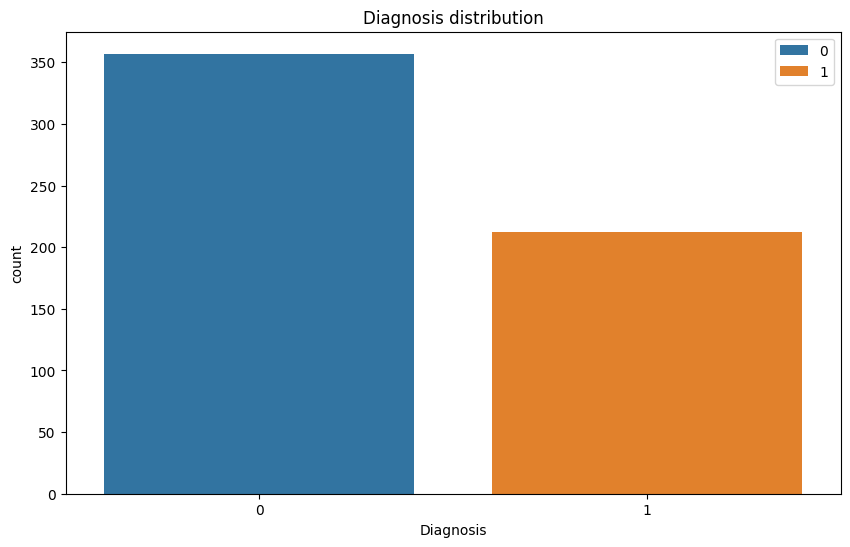

In [21]:
#Plotting the figure
plt.figure(figsize=(10,6))

#countplot
sns.countplot(x="diagnosis", data=df,hue="diagnosis")

#Labels
plt.title("Diagnosis distribution")
plt.xlabel("Diagnosis")
plt.ylabel("count")
plt.legend()

#Display the visual
plt.show()



The counplot clearly shows that benign counts are greater than Malignant. showing an imbalance

In [22]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

4.1.2 Visualizing the radius_mean

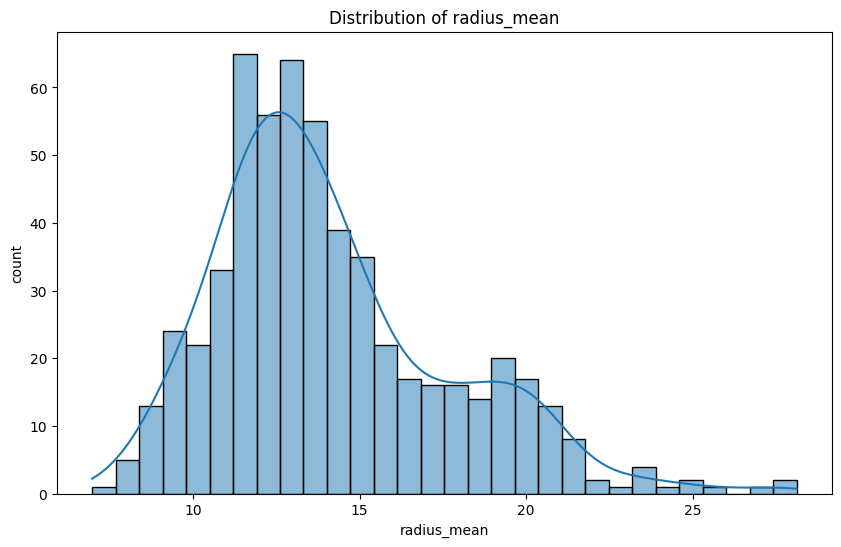

In [23]:
#plotting the figure
plt.figure(figsize=(10,6))

#hist plot
sns.histplot(df["radius_mean"],kde=True,bins=30)

#labels
plt.title("Distribution of radius_mean")
plt.xlabel("radius_mean")
plt.ylabel("count")

#Display the visual
plt.show()



Our data is right skewed,most of the radius_mean range between 10-15 and a couple of them above that

4.1.3 Visualizing the area_mean

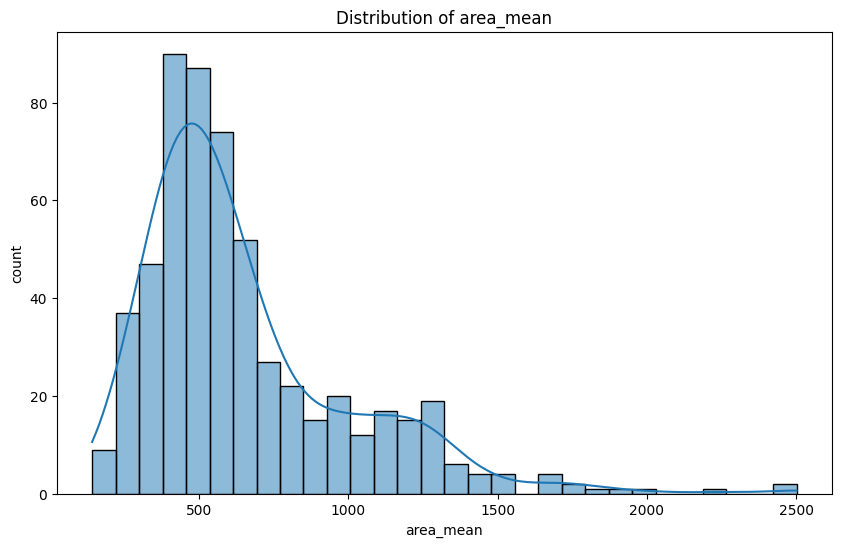

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x="area_mean",kde=True,bins=30)
plt.title("Distribution of area_mean")
plt.xlabel("area_mean")
plt.ylabel("count")
plt.show()



Area_mean is also right skewed

**Checking  skewness of area and radius**

From the graphs above, radius_mean and area_mean we can clearly see the data is right skewed which can affect how our model predicts

In [25]:
print("Skewness (area_mean):", df['area_mean'].skew())
print("Skewness (radius_mean):", df['radius_mean'].skew())


Skewness (area_mean): 1.6457321756240424
Skewness (radius_mean): 0.9423795716730992


Transforming area_mean since it's heavily skewed compared to radius_mean

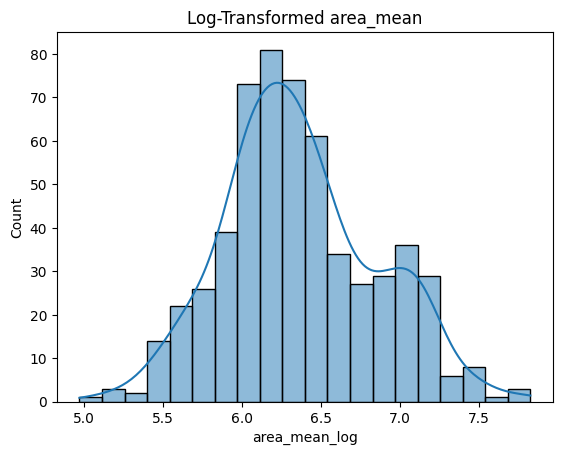

In [26]:
#Applying log transformation to the 'area_mean' column to reduce skewness and handle large variations.
df['area_mean_log'] = np.log(df['area_mean'] + 1) # adding 1 to avoid log(o)

#visualizing using a histplot to see the effect of skewness on our transformed data
sns.histplot(df['area_mean_log'], kde=True)

#labels
plt.title("Log-Transformed area_mean")

#display the visual
plt.show()


our histplot is now less right skewed

OUTLIERS ON COMPACTNESS

compactness refers to how closely packed the cells are within a tumour

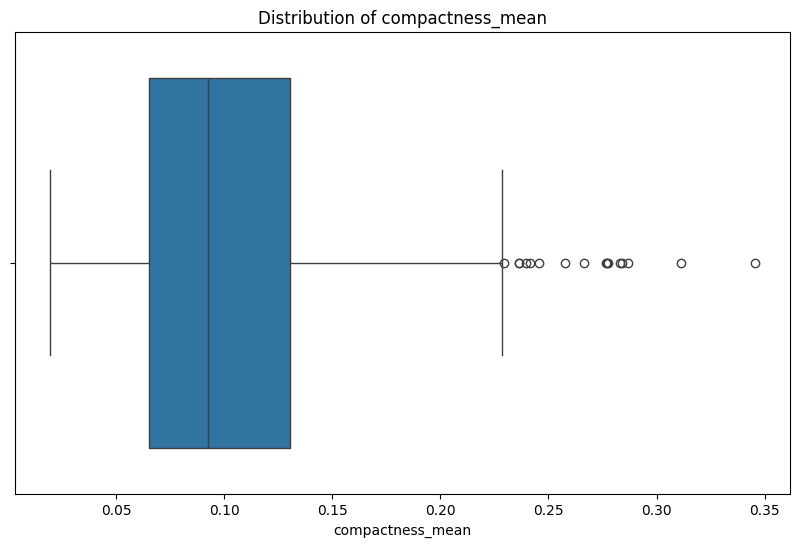

In [27]:
#Plot the figure
plt.figure(figsize=(10,6))

#Create a boxplot to visualize the distribution of compactness mean
sns.boxplot(data=df,x="compactness_mean",orient="h")

#labels
plt.title("Distribution of compactness_mean")
plt.xlabel("compactness_mean")

#display the plot
plt.show()



according to our boxplot there are several outliers which can signify malignant tumours

**BIVARIATE**

* Diagnosis vs radius_mean

we are going to visualize the relationship between diagnosis and radius mean

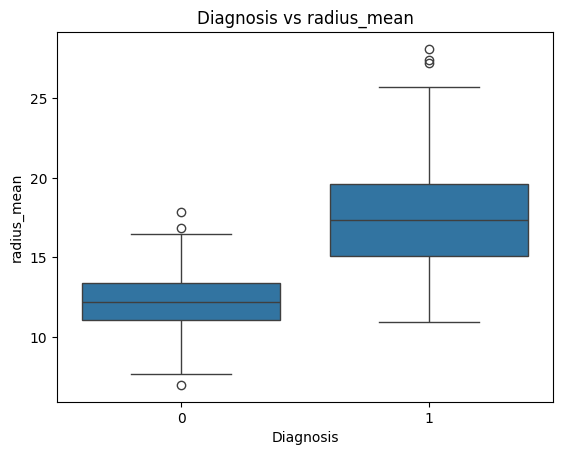

In [28]:
#boxplot
sns.boxplot(data=df,x="diagnosis",y="radius_mean")

#labels
plt.title("Diagnosis vs radius_mean")
plt.xlabel("Diagnosis")
plt.ylabel("radius_mean")

#display the plot
plt.show()



For Malignant tumours, their cells tend to have higher radius compared to benign tumours

**MULTIVARIATE**

**Radius mean vs Area mean**




We are going to visualize the relationship between radius mean and area mean

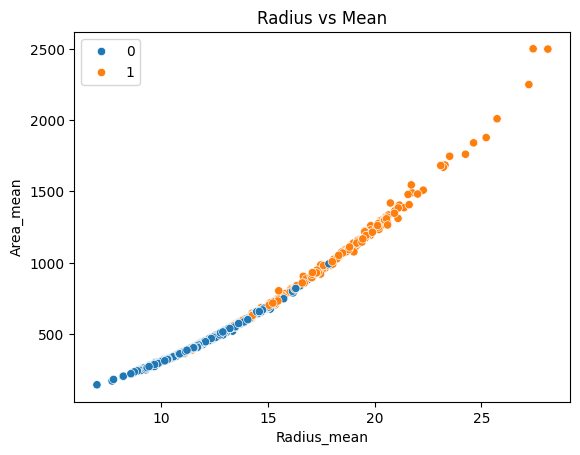

In [29]:
#Scatter plot
sns.scatterplot(data=df,x="radius_mean",y="area_mean",hue="diagnosis")

#labels
plt.title("Radius vs Mean")
plt.xlabel("Radius_mean")
plt.ylabel("Area_mean")
plt.legend()

#Display the plot
plt.show()


From the above scatterplot, we see that area_mean and radius_mean are correlated

We are going to visualize relationships between various features

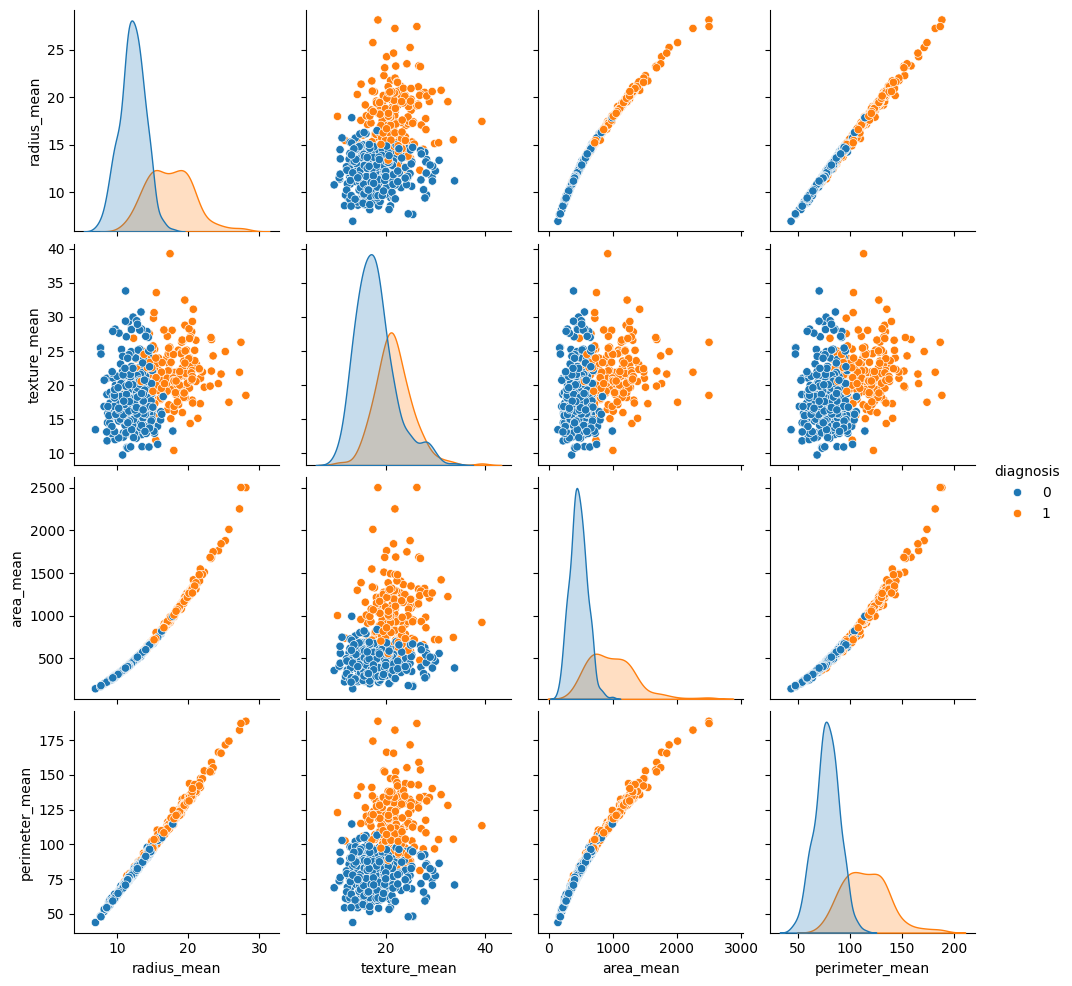

In [30]:
sns.pairplot(df[['radius_mean', 'texture_mean', 'area_mean', 'perimeter_mean', 'diagnosis']], hue='diagnosis')
plt.show()

From the pairplot above there is a noticeable distinction between the two classes especially along the radius_mean, area_mean and also perimeter mean

There are strong linear relationships between some features such as radius_mean, area_mean and also perimeter_mean which show positive correlations

The texture mean shows a less pronounced seperation betweenbenign and malignant unlike the other features

**Interaction Between Radius Mean and Concavity Mean**

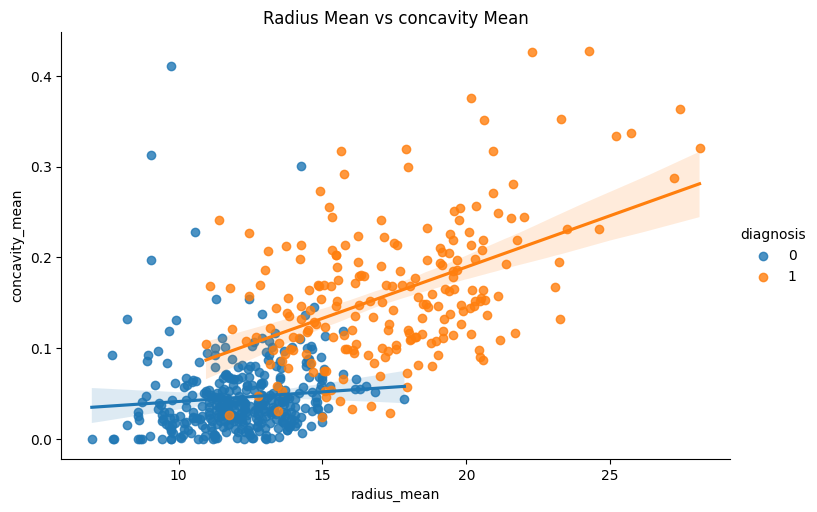

In [31]:
#Scatterplot with a regression line
sns.lmplot(x='radius_mean', y='concavity_mean', hue='diagnosis', data=df, aspect=1.5)

#labels
plt.title("Radius Mean vs concavity Mean")

#display the plot
plt.show()


 Radius mean and concavity mean are positively correlated which means as radius mean increases also the concavity mean tends to increase

**Interaction between texture mean and radius mean**

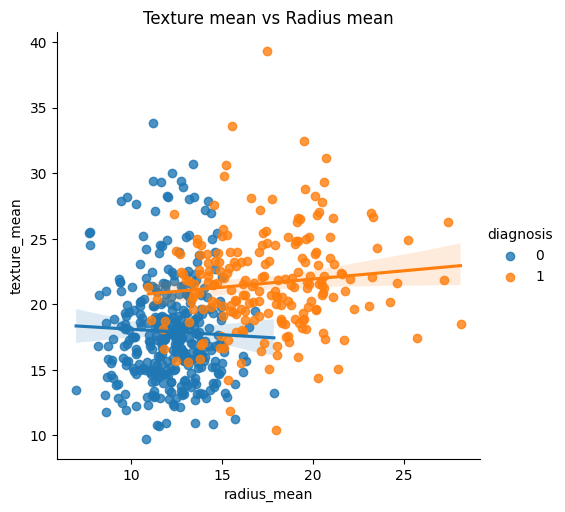

In [32]:
#Scatterplot with a regression line
sns.lmplot(data=df,x="radius_mean",y="texture_mean",hue="diagnosis")

#labels
plt.title("Texture mean vs Radius mean")

#Display the plot
plt.show()

in the above plot, There is an overlap between the 2 classes especially for small radius which implies that texture_mean may alone may not be helpful in distinguishing benign and malignant

Interaction between smoothness_mean and compactness_mean

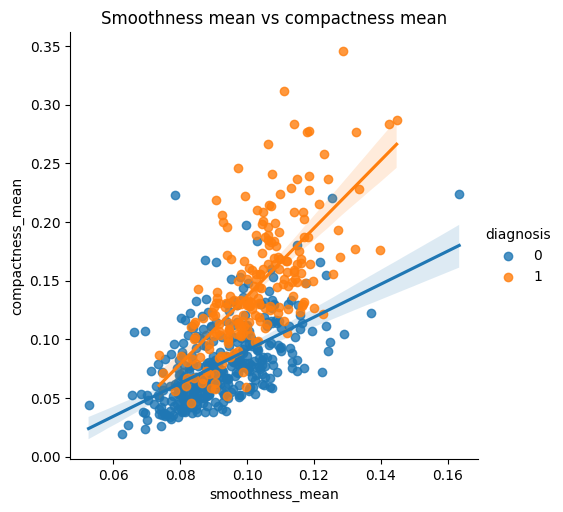

In [33]:
sns.lmplot(data=df,x="smoothness_mean",y="compactness_mean",hue="diagnosis")
plt.title("Smoothness mean vs compactness mean")
plt.show()

In [34]:
df["diagnosis"].value_counts()
#There's imbalance in our diagnosis groups we'll handle that during the model selection and training

diagnosis
0    357
1    212
Name: count, dtype: int64

**TTEST ON Radius_mean**

In [35]:
benign = df[df['diagnosis'] == 0]['radius_mean']
malignant = df[df['diagnosis'] == 1]['radius_mean']
t_statistic, p_value = ttest_ind(benign, malignant)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

#The small p value shows there's a very large difference between the diagnosis groups hence its very unlikely to have occured by chance

T-statistic: -25.435821610057054
P-value: 8.465940572262422e-96


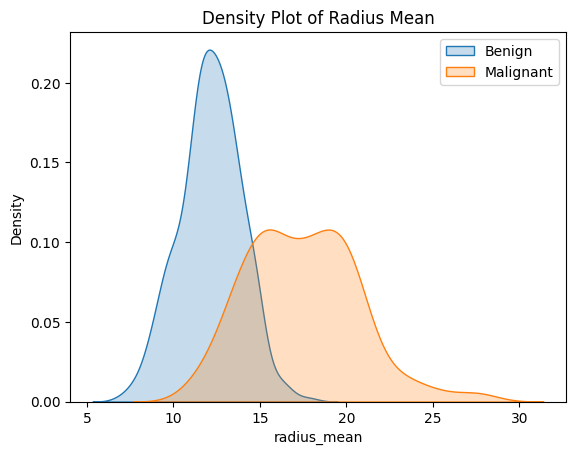

In [36]:
sns.kdeplot(benign, label='Benign', shade=True)
sns.kdeplot(malignant, label='Malignant', shade=True)
plt.title('Density Plot of Radius Mean')
plt.legend()
plt.show()


Exploring other features(area mean, compactness mean, concavity mean)

In [37]:
features = ['area_mean_log', 'compactness_mean', 'concavity_mean',"smoothness_mean","texture_mean"]
for feature in features:
    benign = df[df['diagnosis'] == 0][feature]
    malignant = df[df['diagnosis'] == 1][feature]
    t_statistic, p_value = ttest_ind(benign, malignant)
    print(f"Feature: {feature}")
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")




#The p values are extremely small which mean that these values are not just by random chance theres a significant difference between the two groups

Feature: area_mean_log
T-statistic: -25.283679996450466
P-value: 5.17608568673299e-95
Feature: compactness_mean
T-statistic: -17.69839197688993
P-value: 3.9382631058873895e-56
Feature: concavity_mean
T-statistic: -23.103963430622642
P-value: 9.966555755072963e-84
Feature: smoothness_mean
T-statistic: -9.146098808149038
P-value: 1.051850359203201e-18
Feature: texture_mean
T-statistic: -10.86720108146434
P-value: 4.0586360478980736e-25


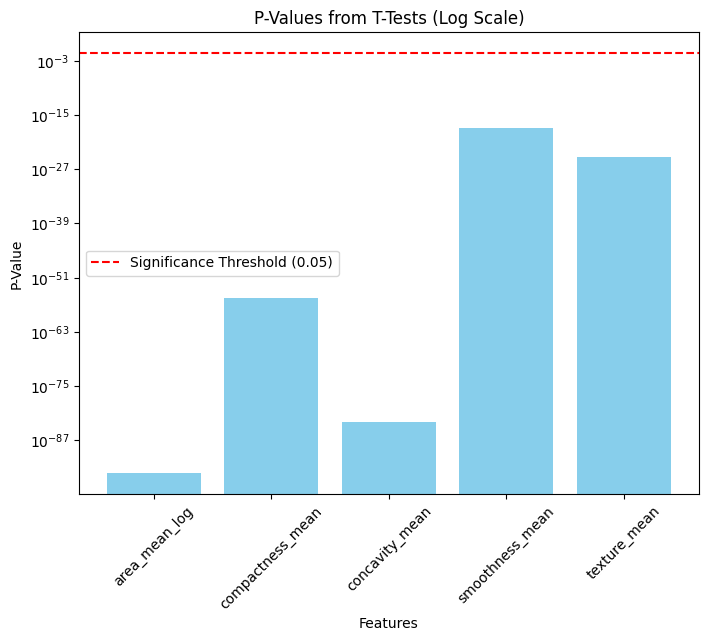

In [38]:

p_value_dict = {
    'area_mean_log': 5.18e-95,
    'compactness_mean': 3.94e-56,
    'concavity_mean': 9.97e-84,
    'smoothness_mean': 1.05e-18,
    'texture_mean': 4.06e-25
}


plt.figure(figsize=(8, 6))
plt.bar(p_value_dict.keys(), p_value_dict.values(), color='skyblue')
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')  # Red line for significance
plt.xlabel('Features')
plt.ylabel('P-Value')
plt.yscale('log')  # Log scale to visualize small p-values better
plt.title('P-Values from T-Tests (Log Scale)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

plt.show()

# FEATURE SELECTION

In [39]:
#Dictionary storing the p values of various features
p_values_dict = {
     'radius_mean': 8.47e-96,
    'area_mean_log': 5.18e-95,
    'compactness_mean': 3.94e-56,
    'concavity_mean': 9.97e-84,
    'smoothness_mean': 1.05e-18,
    'texture_mean': 4.06e-25

}
#defining the significance level threshold
threshold = 0.05

#selecting features whose p value is less that the threshold
selected_features = [feature for feature, p_value in p_values_dict.items() if p_value < threshold]

print("Selected Features:", selected_features)

#All have a p value thats less than the set threshold which means they can be used for modelling

Selected Features: ['radius_mean', 'area_mean_log', 'compactness_mean', 'concavity_mean', 'smoothness_mean', 'texture_mean']


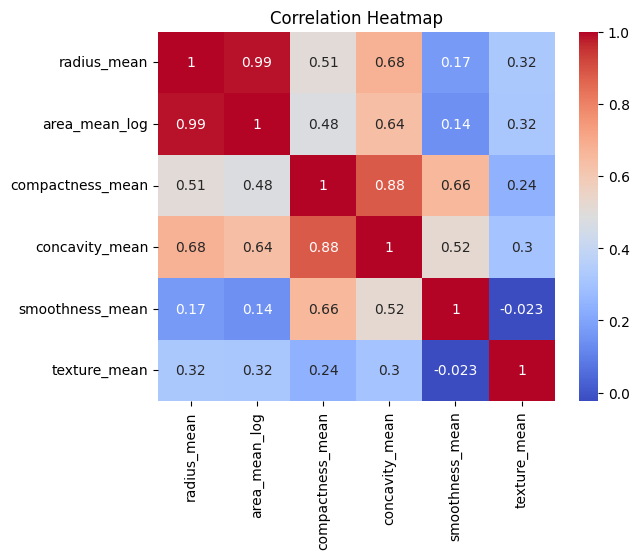

In [40]:
#Calculating the correlation matrix of the selected features
correlation_matrix = df[selected_features].corr()

#visualizing the correlations using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

#Labels
plt.title('Correlation Heatmap')

#display the visual
plt.show()

#area_mean_log and radius mean are highly correlated which may lead to multicollinearity..redundant info. so we're going to drop on from our selected features
#also compactness and concavity..


area_mean_log and radius mean are highly correlated which may lead to multicollinearity..redundant info. so we're going to drop on from our selected features
also compactness and concavity..

Defining which features to select

In [41]:
final_features = ['radius_mean', 'concavity_mean', 'smoothness_mean', 'texture_mean']

# **Feature Scaling**

Standardization

In [42]:
# Initializing the standard scaler
scaler = StandardScaler()

# Creating a copy of the dataframe to avoid modifying the original one
df_scaled = df.copy()

# Apply scaling to the selected features
df_scaled[final_features] = scaler.fit_transform(df[final_features])

# Print the first five rows of only the selected features
print(df_scaled[final_features].head())

   radius_mean  concavity_mean  smoothness_mean  texture_mean
0     1.097064        2.652874         1.568466     -2.073335
1     1.829821       -0.023846        -0.826962     -0.353632
2     1.579888        1.363478         0.942210      0.456187
3    -0.768909        1.915897         3.283553      0.253732
4     1.750297        1.371011         0.280372     -1.151816


# TRAINING OUR MODEL


In [43]:
#Define the features x
x = df_scaled[final_features]

#Define the target variable
y = df["diagnosis"]

#Split the dataset into training and testing sets where 80% is used to train and 205 to test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#We are going to use SMOTE to balance our dataset, remember we saw that the counts of benign were a bit higher than those of malignant.
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [44]:
# Creating a directory to save models
os.makedirs("models", exist_ok=True)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Looping through the models
for name, model in models.items():
    print(f"\n{name}")  # Printing the name of the model

    # Fitting the model to the training data
    model.fit(x_train_resampled, y_train_resampled)

    # Predicting the target variable on x_test
    y_pred = model.predict(x_test)

    # Print the accuracy score, classification report, and confusion matrix
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Perform cross-validation and print mean accuracy
    cv_scores = cross_val_score(model, x_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
    print(f"\nCross-Validation Scores: {cv_scores}")
    print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

    # Save the trained model
    model_filename = f"models/{name.replace(' ', '_')}.pkl"
    joblib.dump(model, model_filename)
    print(f"Model saved as {model_filename}")


Logistic Regression
Accuracy Score: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.93      0.98      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114


Confusion Matrix:
 [[68  3]
 [ 1 42]]

Cross-Validation Scores: [0.93043478 0.93913043 0.92105263 0.96491228 0.92982456]
Mean CV Accuracy: 0.9371
Model saved as models/Logistic_Regression.pkl

K-Nearest Neighbors
Accuracy Score: 0.9385964912280702

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94   

# EVALUATION

3 models were evaluated on their ability to classify the breast tumours as benign or malignant based on various features from the dataset
According to their perfomance, we decided to choose Random Forest classifier, reasons:


*   It has a strong perfomance in terms of accuracy, recall and also precision
*   High cross validation which indicates that the model will work well on unseen data
*   It is less affected by outliers












# CONCLUSIONS



*   Malignant tumors have higher radius and area values which aligns with their nature and faster growth
*   Some features such as compactness mean had outliers which may signify aggressive tumors or unique cases that require further investigation
*  Applyong SMOTE addressed the class imbalance in the dataset ensuring that both benign and malignant cases were adequately represented in the training data
*  Scaling the features helped improve model perfomance by ensuring that features like KNN were not affected



# RECOMMENDATIONS

In [45]:
df_scaled[["diagnosis", "radius_mean", "concavity_mean", "smoothness_mean", "texture_mean"]].head(30)

,diagnosis,radius_mean,concavity_mean,smoothness_mean,texture_mean
0,1,1.097064,2.652874,1.568466,-2.073335
1,1,1.829821,-0.023846,-0.826962,-0.353632
2,1,1.579888,1.363478,0.942210,0.456187
3,1,-0.768909,1.915897,3.283553,0.253732
4,1,1.750297,1.371011,0.280372,-1.151816
5,1,-0.476375,0.866302,2.237421,-0.835335
6,1,1.170908,0.300072,-0.123136,0.160649
7,1,-0.118517,0.061026,1.604049,0.358450
8,1,-0.320167,1.219096,2.201839,0.588830
9,1,-0.473535,1.738872,1.582699,1.105439
